In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

## Data Loading
Load the csv file and check the description

In [3]:
df = pd.read_csv("AQI and Lat Long of Countries.csv")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [5]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


### Data Cleaning
In order to perform classification for this data, I decided to drop the Country, City, latitude, longitude. I checked the unique entries for the categories for ach of the AQI values.

In [6]:
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [7]:
df['CO AQI Category'].unique()

array(['Good', 'Unhealthy for Sensitive Groups', 'Moderate'], dtype=object)

In [8]:
df['Ozone AQI Category'].unique()

array(['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups'], dtype=object)

In [9]:
df['NO2 AQI Category'].unique()

array(['Good', 'Moderate'], dtype=object)

In [10]:
df['PM2.5 AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [11]:
df = df.drop(['Country','City','lat','lng'],axis=1)
df.head()

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,41,Good,1,Good,5,Good,1,Good,41,Good
2,41,Good,1,Good,5,Good,1,Good,41,Good
3,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
4,34,Good,1,Good,34,Good,0,Good,20,Good


Now encode the categorical data. I am using LabelEncoder for this task.

In [12]:
label_encoder = LabelEncoder()
df['AQI Category'] = label_encoder.fit_transform(df['AQI Category'])
df['CO AQI Category'] = label_encoder.fit_transform(df['CO AQI Category'])
df['Ozone AQI Category'] = label_encoder.fit_transform(df['Ozone AQI Category'])
df['NO2 AQI Category'] = label_encoder.fit_transform(df['NO2 AQI Category'])
df['PM2.5 AQI Category'] = label_encoder.fit_transform(df['PM2.5 AQI Category'])
df.head()

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,2,1,0,36,0,0,0,51,2
1,41,0,1,0,5,0,1,0,41,0
2,41,0,1,0,5,0,1,0,41,0
3,66,2,1,0,39,0,2,0,66,2
4,34,0,1,0,34,0,0,0,20,0


Now, I will check the correlation among the features and plot them using a heatmap.

<AxesSubplot:>

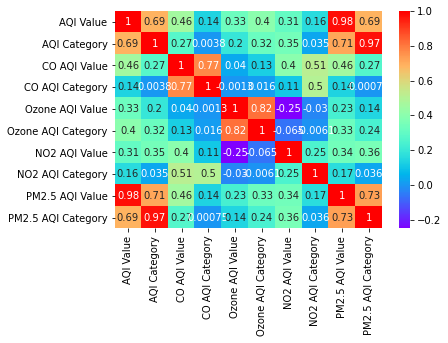

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="rainbow")

### Classification
Now perform the split into train and test set. Then apply a KNN model. Find the best parameters using RandomSearch.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [21]:
Y = df['AQI Category']
X = df.drop(columns='AQI Category',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.75,random_state=50)

In [51]:
hyp_parameters = {
    'n_neighbors':range(1,20),
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [55]:
knn = KNeighborsClassifier()
rnd_search = RandomizedSearchCV(knn,param_distributions=hyp_parameters)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(1, 20),
                                        'weights': ['uniform', 'distance']})

In [56]:
rnd_search.best_score_

0.995926740767666

In [57]:
rnd_search.best_params_

{'weights': 'distance', 'n_neighbors': 6, 'algorithm': 'auto'}

In [58]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=6, algorithm= 'auto')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

Now perform predictions and check the confusion matrix.

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
y_pred = knn.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1959
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00      1747
           3       0.98      0.99      0.98       230
           4       0.98      0.97      0.98       203
           5       0.86      0.95      0.90        20

    accuracy                           1.00      4174
   macro avg       0.96      0.98      0.97      4174
weighted avg       1.00      1.00      1.00      4174



In [62]:
print(confusion_matrix(y_test,y_pred))

[[1959    0    0    0    0    0]
 [   0   15    0    0    0    0]
 [   0    0 1744    0    3    0]
 [   0    0    0  227    0    3]
 [   0    0    2    5  196    0]
 [   0    1    0    0    0   19]]
